In [2]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers.pipelines.pt_utils import KeyDataset
#from datasets import load_dataset
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import io
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import re
import datetime

In [3]:
df_best_1 = pd.read_csv("Amazon.co.uk_ Best_All_Reviews(1).csv")
df_best_2 = pd.read_csv("Amazon.co.uk_ Best_All_Reviews(2).csv")
df_best_3 = pd.read_csv("Amazon.co.uk_ Best_All_Reviews(3).csv")

In [4]:
df_best_1.describe()

,Text,Title,Name,aiconalt,View,asizemini,State,View1,asizebase
count,20000,19635,19994,19995,19995,11683,19308,19991,2012
unique,13,11901,15389,5,2564,31,1,18253,82
top,Andrex Gentle Clean Toilet Tissue,Five Stars,Amazon Customer,5.0 out of 5 stars,Reviewed in the United Kingdom on 18 October 2020,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Good\n,One person found this helpful
freq,4676,897,1536,14596,42,3631,19308,133,1210


In [5]:
df_best_1.head()

,Text,Title,Name,aiconalt,View,asizemini,State,View1,asizebase
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0 out of 5 stars,Reviewed in the United Kingdom on 18 September...,Size Name: 45 Count (Pack of 1),Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0 out of 5 stars,Reviewed in the United Kingdom on 11 July 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0 out of 5 stars,Reviewed in the United Kingdom on 8 May 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0 out of 5 stars,Reviewed in the United Kingdom on 2 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0 out of 5 stars,Reviewed in the United Kingdom on 29 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [6]:
# setting the path for joining multiple files
files = os.path.join("C:/Users/warne/Desktop/Papers/Emilia - Amazon/", "Amazon.co.uk_ Best_All_Reviews***.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
                                                      Text  \
0                        Andrex Gentle Clean Toilet Tissue   
1                        Andrex Gentle Clean Toilet Tissue   
2                        Andrex Gentle Clean Toilet Tissue   
3                        Andrex Gentle Clean Toilet Tissue   
4                        Andrex Gentle Clean Toilet Tissue   
...                                                    ...   
1019995  Garnier Hand Repair Intensive Restoring Hand C...   
1019996  Linda's Silicone Stove Gap Covers (2 Pack), He...   
1019997  Linda's Silicone Stove Gap Covers (2 Pack), He...   
1019998  Linda's Silicone Stove Gap Covers (2 Pack), He...   
1019999  Linda's Silicone Stove Gap Covers (2 Pack), He...   

                                                     Title            Name  \
0                             Fun Size C Wafer Thin Andrex        DM Bunny   
1             They've shrunk.

In [7]:
df.head()

,Text,Title,Name,aiconalt,View,asizemini,State,View1,asizebase
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0 out of 5 stars,Reviewed in the United Kingdom on 18 September...,Size Name: 45 Count (Pack of 1),Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0 out of 5 stars,Reviewed in the United Kingdom on 11 July 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0 out of 5 stars,Reviewed in the United Kingdom on 8 May 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0 out of 5 stars,Reviewed in the United Kingdom on 2 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0 out of 5 stars,Reviewed in the United Kingdom on 29 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [8]:
df.rename(columns = {"Text":"Product", "Title":"Title of Review", "View":"Location and Date", "aiconalt":"Individual Review", "View1": "Review", "asizebase": "Helpful"}, inplace= True)

In [9]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,asizemini,State,Review,Helpful
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0 out of 5 stars,Reviewed in the United Kingdom on 18 September...,Size Name: 45 Count (Pack of 1),Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0 out of 5 stars,Reviewed in the United Kingdom on 11 July 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0 out of 5 stars,Reviewed in the United Kingdom on 8 May 2019,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0 out of 5 stars,Reviewed in the United Kingdom on 2 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0 out of 5 stars,Reviewed in the United Kingdom on 29 March 2018,Size Name: 45 Count (Pack of 1),Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [10]:
df.isna().sum()

Product                   0
Title of Review      305188
Name                    567
Individual Review       530
Location and Date       530
asizemini            238599
State                 28373
Review                 1273
Helpful              897123
dtype: int64

In [11]:
df.drop(columns="asizemini", inplace=True)

In [12]:
df.dropna(subset=["Review"], inplace=True)

In [13]:
df.isna().sum()

Product                   0
Title of Review      304341
Name                     37
Individual Review         0
Location and Date         0
State                 27824
Review                    0
Helpful              895934
dtype: int64

In [14]:
df.describe()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful
count,1018727,714386,1018690,1018727,1018727,990903,1018727,122793
unique,950,333843,519420,5,27200,1,904448,415
top,Moleskine Classic Ruled Paper Notebook,Five Stars,Amazon Customer,5.0 out of 5 stars,Reviewed in the United Kingdom on 13 December ...,Verified Purchase,\n Good\n,One person found this helpful
freq,8327,47287,69286,724449,1025,990903,4430,68307


In [15]:
df[["Individual Review"]] = df[["Individual Review"]].apply(lambda x: x.str.rstrip(' out of 5 stars'))

In [16]:
df =  df.astype(str)


In [17]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,Reviewed in the United Kingdom on 18 September...,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,Reviewed in the United Kingdom on 11 July 2019,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,Reviewed in the United Kingdom on 8 May 2019,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,Reviewed in the United Kingdom on 2 March 2018,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,Reviewed in the United Kingdom on 29 March 2018,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [18]:
df['Location and Date'] = df['Location and Date'].apply(lambda x: x.lstrip('Reviewed in the '))

In [19]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom on 18 September 2017,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom on 11 July 2019,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom on 8 May 2019,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom on 2 March 2018,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom on 29 March 2018,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [20]:
df["Helpful"] = df['Helpful'].apply(lambda x: x.replace(',',''))

In [21]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom on 18 September 2017,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom on 11 July 2019,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom on 8 May 2019,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom on 2 March 2018,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom on 29 March 2018,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful


In [22]:
df["Date"] = df["Location and Date"]

In [23]:
df["Date"] = df["Date"].apply(lambda x: x.split(' on ')[-1].strip())

In [24]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful,Date
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom on 18 September 2017,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful,18 September 2017
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom on 11 July 2019,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful,11 July 2019
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom on 8 May 2019,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful,8 May 2019
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom on 2 March 2018,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful,2 March 2018
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom on 29 March 2018,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful,29 March 2018


In [25]:
df["Location and Date"] = df["Location and Date"].apply(lambda x: x.split(' on ')[0].strip())

In [26]:
df.head()

,Product,Title of Review,Name,Individual Review,Location and Date,State,Review,Helpful,Date
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful,18 September 2017
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful,11 July 2019
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful,8 May 2019
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful,2 March 2018
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful,29 March 2018


In [27]:
df.rename(columns={"Location and Date": "Location"}, inplace = True)

In [28]:
df.head()

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful,18 September 2017
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful,11 July 2019
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful,8 May 2019
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful,2 March 2018
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful,29 March 2018


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018727 entries, 0 to 1019999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Product            1018727 non-null  object
 1   Title of Review    1018727 non-null  object
 2   Name               1018727 non-null  object
 3   Individual Review  1018727 non-null  object
 4   Location           1018727 non-null  object
 5   State              1018727 non-null  object
 6   Review             1018727 non-null  object
 7   Helpful            1018727 non-null  object
 8   Date               1018727 non-null  object
dtypes: object(9)
memory usage: 77.7+ MB


In [30]:
df[["day","month", "year"]] = df["Date"].apply(lambda x: pd.Series(x.split(' ')))

In [31]:
df["Date"] = pd.to_datetime(df['year'].astype(str)  + df['month'] + df["day"], format='%Y%B%d')

In [32]:
df.head()

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date,day,month,year
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593 people found this helpful,2017-09-18,18,September,2017
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom,Verified Purchase,"\n I've been ordering these for about a year,...",242 people found this helpful,2019-07-11,11,July,2019
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom,Verified Purchase,\n Ibought these after buying similar ones pr...,209 people found this helpful,2019-05-08,8,May,2019
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom,Verified Purchase,\n I have to admit that I just don't like And...,34 people found this helpful,2018-03-02,2,March,2018
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom,Verified Purchase,\n Not really a bargain as it comes a lot les...,216 people found this helpful,2018-03-29,29,March,2018


In [33]:
df.drop(columns = ["day", "month", "year"], inplace= True)

In [34]:
df["Helpful"].value_counts()

nan                               895934
One person found this helpful      68307
2 people found this helpful        18811
3 people found this helpful         8618
4 people found this helpful         4953
                                   ...  
593 people found this helpful          1
1118 people found this helpful         1
377 people found this helpful          1
260 people found this helpful          1
356 people found this helpful          1
Name: Helpful, Length: 416, dtype: int64

In [35]:
df["Helpful"] = df["Helpful"].apply(lambda x: x.rstrip('people found this helpful'))

In [36]:
df["Helpful"].value_counts()

na         895934
One per     68307
2           18811
3            8618
4            4953
            ...  
794             1
244             1
916             1
350             1
944             1
Name: Helpful, Length: 416, dtype: int64

In [37]:
df["Helpful"].replace(['One per', "na"], [1, 0], inplace = True)

In [38]:
df.head()

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date
0,Andrex Gentle Clean Toilet Tissue,Fun Size C Wafer Thin Andrex,DM Bunny,1.0,United Kingdom,Verified Purchase,"How easily people are fooled.\n\nThese ""Andrex...",593,2017-09-18
1,Andrex Gentle Clean Toilet Tissue,"They've shrunk..half the size, same price...",H.,1.0,United Kingdom,Verified Purchase,"\n I've been ordering these for about a year,...",242,2019-07-11
2,Andrex Gentle Clean Toilet Tissue,"Not the same quality as norm,al Andrex",Adrian Lingard,1.0,United Kingdom,Verified Purchase,\n Ibought these after buying similar ones pr...,209,2019-05-08
3,Andrex Gentle Clean Toilet Tissue,Bargain price - just be careful to get rid of ...,Mogwai,3.0,United Kingdom,Verified Purchase,\n I have to admit that I just don't like And...,34,2018-03-02
4,Andrex Gentle Clean Toilet Tissue,Not really a bargain,Magdalene,1.0,United Kingdom,Verified Purchase,\n Not really a bargain as it comes a lot les...,216,2018-03-29


In [39]:
df[["Product", "Title of Review", "Name", "Location", "State", "Review"]].astype(str).dtypes
df[["Individual Review"]].astype(float)
df[["Helpful"]].astype(int)

,Helpful
0,593
1,242
2,209
3,34
4,216
...,...
1019995,0
1019996,0
1019997,0
1019998,0


In [40]:
df["Location"].value_counts()

United Kingdom    714459
United States      76238
Italy              65322
Germany            59078
Spain              43261
France             31253
Canada             16841
Mexico              5955
India               2268
Japan               1772
Australia           1025
Brazil               798
Netherlands          227
Sweden               153
Singapore             52
Poland                25
Name: Location, dtype: int64

In [41]:
#df.to_csv('all_best_products_cleaned.csv')

In [42]:
df.describe()

<ipython-input-42-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date
count,1018727,1018727,1018727,1018727,1018727,1018727,1018727,1018727.0,1018727
unique,950,333844,519421,5,16,2,904448,416.0,4677
top,Moleskine Classic Ruled Paper Notebook,nan,Amazon Customer,5.0,United Kingdom,Verified Purchase,\n Good\n,0.0,2020-12-13 00:00:00
freq,8327,304341,69286,724449,714459,990903,4430,895934.0,1269
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-12-15 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-13 00:00:00


In [43]:
(df == "NaN").all(axis=0)

Product              False
Title of Review      False
Name                 False
Individual Review    False
Location             False
State                False
Review               False
Helpful              False
Date                 False
dtype: bool

In [57]:
#greater than the start date and smaller than the end date
df_covd_dates = df[(df["Date"] > "2019-12-01") & (df['Date'] <= "2020-08-01")]

In [58]:
df_covd_dates.describe()

<ipython-input-58-41ec728bacd6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_covd_dates.describe()


,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date
count,155836,155836,155836,155836,155836,155836,155836,155836.0,155836
unique,738,60053,97059,5,14,2,141479,177.0,244
top,"Gritin Resistance Bands, [Set of 5] Skin-Frien...",nan,Amazon Customer,5.0,United Kingdom,Verified Purchase,\n Good\n,0.0,2020-01-02 00:00:00
freq,1579,48023,10532,113404,107830,153357,751,139911.0,1002
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01 00:00:00


In [59]:
(df_covd_dates["Review"] == "NaN").value_counts()

False    155836
Name: Review, dtype: int64

In [47]:
df_covd_dates["Review"].value_counts()

\n  Good\n                                                                                                                                                                                                                                                                                                                                                                                                                           416
\n  Great\n                                                                                                                                                                                                                                                                                                                                                                                                                          273
\n  Great product\n                                                                                                                                   

In [60]:
df_covd_dates["Location"].value_counts()

United Kingdom    107830
United States      11639
Italy              11279
Germany             8516
Spain               7685
France              4578
Canada              2558
Mexico               997
India                308
Japan                240
Australia            138
Brazil                52
Singapore             10
Netherlands            6
Name: Location, dtype: int64

### Drop non English speaking countries

In [61]:
df_covd_dates = df_covd_dates.loc[df_covd_dates["Location"].isin(["United Kingdom", "United States", "Canada", "India", "Australia"])]

In [62]:
df_covd_dates["Location"].value_counts()

United Kingdom    107830
United States      11639
Canada              2558
India                308
Australia            138
Name: Location, dtype: int64

In [63]:
df_covd_dates.dtypes

Product                      object
Title of Review              object
Name                         object
Individual Review            object
Location                     object
State                        object
Review                       object
Helpful                      object
Date                 datetime64[ns]
dtype: object

In [64]:
df_covd_dates.to_csv('best_products_for_sentimental.csv')

# Sentimental Analysis

## https://www.youtube.com/watch?v=GSt00_-0ncQ used this youtube video

In [52]:
dataset = df_covd_dates["Review"].tolist()
dataset

['\n  Why the change of price for those of us who regularly buy this sort of amount of toilet rolls, especially when the price increase is due to a totally unnecessary demand from overbuying clowns panicking about T Rolls which are entirely unrelated to the obvious, current situation.To be not told, and supposed to guess the price is not good enough and to be at the mercy of, as I say, this ridiculous over buying by the panic squad, and the supplies of this item. What happens 6 months from now when they are no longer buying and I am, so I deserve the usual old price and not some overpriced item caused by the panic squad with more money than sense.Please rebate for those of us not causing the panicking and not liable for price increases like this.\n',
 "\n  We brought Andrex multi on a few occasions, and have previously thought how great they are, saving worries of running out of loo roll and bulk of shopping to carry. We received our latest order few days ago and the size of the rolls 

In [53]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation = True, padding = True, max_length = 512)

### For creating pipeline

In [54]:
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer = tokenizer, device = 0, truncation=True)

#results = classifier(dataset)
#results = classifier(df_covd_dates['Review'])
#for result in results(KeyDataset(dataset), batch_size = 8):
#    print(result)

In [55]:
results = classifier(dataset)

KeyboardInterrupt: 

In [ ]:
results[0:5]

[{'label': 'NEGATIVE', 'score': 0.9997300505638123},
 {'label': 'NEGATIVE', 'score': 0.9979450106620789},
 {'label': 'NEGATIVE', 'score': 0.9989913105964661},
 {'label': 'NEGATIVE', 'score': 0.999521017074585},
 {'label': 'NEGATIVE', 'score': 0.9996353387832642}]

In [ ]:
df_covd_dates["Review"].head()

0    \n  Why the change of price for those of us wh...
1    \n  We brought Andrex multi on a few occasions...
2    \n  Disappointed in these thinned out, less de...
3    \n  I picked these up as there was a great off...
4    \n  Don't buy thinking its the usual Andrex ro...
Name: Review, dtype: object

In [ ]:
df_sentimental= pd.DataFrame (results)

In [ ]:
df_sentimental[:11]

,label,score
0,NEGATIVE,0.999730
1,NEGATIVE,0.997945
2,NEGATIVE,0.998991
3,NEGATIVE,0.999521
4,NEGATIVE,0.999635
5,NEGATIVE,0.999800
6,NEGATIVE,0.999577
7,NEGATIVE,0.997221
8,NEGATIVE,0.983686
9,NEGATIVE,0.996005


### Next steps shows how to create your own model 

In [ ]:
tokens = tokenizer.tokenize("I hope you don't die.")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = tokenizer("I hope you don't die.")

print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')
print(f'Input IDs: {input_ids}')

   Tokens: ['i', 'hope', 'you', 'don', "'", 't', 'die', '.']
Token IDs: [1045, 3246, 2017, 2123, 1005, 1056, 3280, 1012]
Input IDs: {'input_ids': [101, 1045, 3246, 2017, 2123, 1005, 1056, 3280, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#X_train = ["I am very happy to show you the Transformer library.", "We hope you don't hate it."]

#batch = tokenizer(X_train, padding= True, truncation= True, max_length= 512, return_tensors= "pt")

#with torch.no_grad():
    #outputs = model(**batch, labels = torch.tensor([1,0]))
    #print(outputs)
    #predictions = F.softmax(outputs.logits, dim = 1)
    #print(predictions)
    #labels = torch.argmax(predictions, dim = 1)
    #print(labels)
    #labels = [model.config.id2label[label_id] for label_id in labels.tolist()]
    #print(labels)


IndentationError: unexpected indent (<ipython-input-53-69b61036aa63>, line 6)

In [ ]:
#save_directory = "saved"
#tokenizer.save_pretrained(save_directory)
##model.save_pretrained(save_directory)

#tokenizer = AutoTokenizer.from_pretrained(save_directory)
#model = AutoModelForSequenceClassification.from_pretrained((save_directory))

# Merge sentimental and products

In [ ]:
df_sentimental_with_products = df_covd_dates
df_sentimental_with_products.reset_index(drop=True, inplace=True)
df_sentimental_with_products = df_sentimental_with_products.join(df_sentimental)
df_sentimental_with_products

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date,label,score
0,Andrex Gentle Clean Toilet Tissue,Overpriced nonsense,Mr R H Angus,2.0,United Kingdom,Verified Purchase,\n Why the change of price for those of us wh...,2,2020-03-19,NEGATIVE,0.999730
1,Andrex Gentle Clean Toilet Tissue,CON,Customer in York,1.0,United Kingdom,Verified Purchase,\n We brought Andrex multi on a few occasions...,2,2020-01-05,NEGATIVE,0.997945
2,Andrex Gentle Clean Toilet Tissue,Sad sad sad,El,1.0,United Kingdom,Verified Purchase,"\n Disappointed in these thinned out, less de...",2,2020-03-09,NEGATIVE,0.998991
3,Andrex Gentle Clean Toilet Tissue,"Great value, but too thin",Miles,4.0,United Kingdom,Verified Purchase,\n I picked these up as there was a great off...,1,2020-03-02,NEGATIVE,0.999521
4,Andrex Gentle Clean Toilet Tissue,Andrex Rolls on a diet,wantice,1.0,United Kingdom,Verified Purchase,\n Don't buy thinking its the usual Andrex ro...,2,2019-12-15,NEGATIVE,0.999635
...,...,...,...,...,...,...,...,...,...,...,...
59126,Bio-Oil Skincare Oil - Improve the Appearance ...,Improves appearance of scars,Holly,5.0,United Kingdom,Verified Purchase,\n I've only been using this for a few weeks ...,0,2020-03-16,NEGATIVE,0.975774
59127,AnySharp Knife Sharpener with PowerGrip,Make your own razors,Cupid Stunt,5.0,United Kingdom,Verified Purchase,"\n This is proper, will take metal shavings o...",0,2020-01-24,POSITIVE,0.972497
59128,Garnier Hand Repair Intensive Restoring Hand C...,Good and Cheap,Paul Fadur,5.0,United Kingdom,Verified Purchase,\n Good and Cheap for value\n,0,2020-02-22,POSITIVE,0.997127
59129,Garnier Hand Repair Intensive Restoring Hand C...,Repair dry hand very well,Paul Bell,5.0,United Kingdom,Verified Purchase,\n Very good hand cream\n,0,2020-02-18,POSITIVE,0.999831


In [ ]:
df_group = df_sentimental_with_products.groupby(["Date", "label"]).count()

In [ ]:
df_group

Product  Title of Review  Name  Individual Review  \
Date       label                                                         
2019-12-02 NEGATIVE       71               71    71                 71   
           POSITIVE      188              188   188                188   
2019-12-03 NEGATIVE       83               83    83                 83   
           POSITIVE      243              243   243                243   
2019-12-04 NEGATIVE      110              110   110                110   
...                      ...              ...   ...                ...   
2020-03-30 POSITIVE      210              210   210                210   
2020-03-31 NEGATIVE       97               97    97                 97   
           POSITIVE      233              233   233                233   
2020-04-01 NEGATIVE       78               78    78                 78   
           POSITIVE      256              256   256                256   

                     Location  State  Review  Helpful  score  
Date       label                                              
2019-12-02 NEGATIVE        71     71      71       71     71  
           POSITIVE       188    188     188      188    188  
2019-12-03 NEGATIVE        83     83      83       83     83  
           POSITIVE       243    243     243      243    243  
2019-12-04 NEGATIVE       110    110     110      110    110  
...                       ...    ...     ...      ...    ...  
2020-03-30 POSITIVE       210    210     210      210    210  
2020-03-31 NEGATIVE        97     97      97       97     97  
           POSITIVE       233    233     233      233    233  
2020-04-01 NEGATIVE        78     78      78       78     78  
           POSITIVE       256    256     256      256    256  

[244 rows x 9 columns]

In [ ]:
sns.lineplot(data=df_group, x = "Date", y= "Product",  hue = "label")
plt.figure(figsize = (15,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Date', ylabel='count'>

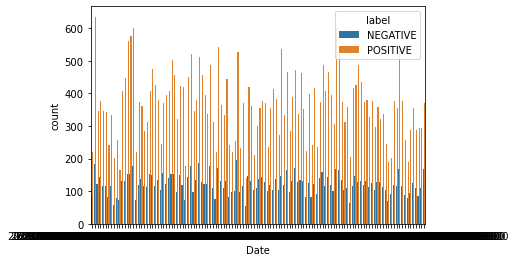

In [ ]:
sns.countplot(data=df_sentimental_with_products, x = "Date", hue = "label")

In [ ]:
sns.lineplot(x='Date', data=df_sentimental_with_products_pos, y = df_sentimental_with_products_pos["label"].count() ci = None)

SyntaxError: invalid syntax (<ipython-input-227-f246c72bd914>, line 1)